# **Multiple Linear Regression**

In [15]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error
from matplotlib import pyplot as plt

In [16]:
df=pd.read_csv('Student_Performance.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours Studied                     10000 non-null  int64  
 1   Previous Scores                   10000 non-null  int64  
 2   Extracurricular Activities        10000 non-null  object 
 3   Sleep Hours                       10000 non-null  int64  
 4   Sample Question Papers Practiced  10000 non-null  int64  
 5   Performance Index                 10000 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 468.9+ KB


In [17]:
#Convert Extracurricular activites to int
df['Extracurricular Activities']=df['Extracurricular Activities'].map({'Yes':1,'No':0})
df.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,1,9,1,91.0
1,4,82,0,4,2,65.0
2,8,51,1,7,2,45.0
3,5,52,1,5,2,36.0
4,7,75,0,8,5,66.0


In [18]:
#spliting into train and test
x= df.drop('Performance Index',axis=1)
y= df['Performance Index']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [19]:
model=LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [20]:
prediction=model.predict(x_test)

In [21]:
print(model.coef_ )
print(model.intercept_)

[2.85248393 1.0169882  0.60861668 0.47694148 0.19183144]
-33.92194621555638


In [22]:
print(f"Mean squared error: {(mean_squared_error(y_test,prediction)):.2f}")
print(f"Mean absolute error: {(mean_absolute_error(y_test, prediction))}")
print(f"R square: {(r2_score(y_test, prediction)):.2f}")

Mean squared error: 4.08
Mean absolute error: 1.6111213463123044
R square: 0.99


Exploring with different test size and random states value

In [25]:
#spliting into train and test
x= df.drop('Performance Index',axis=1)
y= df['Performance Index']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.5,random_state=0)
model=LinearRegression()
model.fit(x_train,y_train)
prediction=model.predict(x_test)
print(model.coef_ )
print(model.intercept_)
print(f"Mean squared error: {(mean_squared_error(y_test,prediction)):.2f}")
print(f"Mean absolute error: {(mean_absolute_error(y_test, prediction))}")
print(f"R square: {(r2_score(y_test, prediction)):.2f}")

[2.84213817 1.02073159 0.65921554 0.47847675 0.19358817]
-34.17998671426317
Mean squared error: 4.11
Mean absolute error: 1.6113450824557731
R square: 0.99


In [26]:
#spliting into train and test
x= df.drop('Performance Index',axis=1)
y= df['Performance Index']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.4,random_state=10)
model=LinearRegression()
model.fit(x_train,y_train)
prediction=model.predict(x_test)
print(model.coef_ )
print(model.intercept_)
print(f"Mean squared error: {(mean_squared_error(y_test,prediction)):.2f}")
print(f"Mean absolute error: {(mean_absolute_error(y_test, prediction))}")
print(f"R square: {(r2_score(y_test, prediction)):.2f}")

[2.85406392 1.01964278 0.59662312 0.46616465 0.18991243]
-34.04579140888636
Mean squared error: 4.17
Mean absolute error: 1.6218788378416593
R square: 0.99


In [27]:
#spliting into train and test
x= df.drop('Performance Index',axis=1)
y= df['Performance Index']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)
model=LinearRegression()
model.fit(x_train,y_train)
prediction=model.predict(x_test)
print(model.coef_ )
print(model.intercept_)
print(f"Mean squared error: {(mean_squared_error(y_test,prediction)):.2f}")
print(f"Mean absolute error: {(mean_absolute_error(y_test, prediction))}")
print(f"R square: {(r2_score(y_test, prediction)):.2f}")

[2.85895223 1.01551979 0.58171285 0.47967676 0.19039416]
-33.836543807141744
Mean squared error: 4.07
Mean absolute error: 1.6090437564045217
R square: 0.99


In [34]:
subset1 = ['Hours Studied', 'Sleep Hours']
subset2 = ['Previous Scores', 'Extracurricular Activities']
subset3 = ['Hours Studied', 'Sleep Hours', 'Sample Question Papers Practiced']

def evaluate_subset(predictors):
    X = df[predictors]
    y = df['Performance Index']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    model = LinearRegression()
    model.fit(X_train, y_train)
    r2 = model.score(X_test, y_test)
    mse = mean_squared_error(y_test, model.predict(X_test))
    print(f"Predictors: {predictors} -> R²: {r2:.2f}, MSE: {mse:.2f}")

evaluate_subset(subset1)
evaluate_subset(subset2)
evaluate_subset(subset3)

Predictors: ['Hours Studied', 'Sleep Hours'] -> R²: 0.14, MSE: 320.25
Predictors: ['Previous Scores', 'Extracurricular Activities'] -> R²: 0.84, MSE: 58.81
Predictors: ['Hours Studied', 'Sleep Hours', 'Sample Question Papers Practiced'] -> R²: 0.14, MSE: 319.97


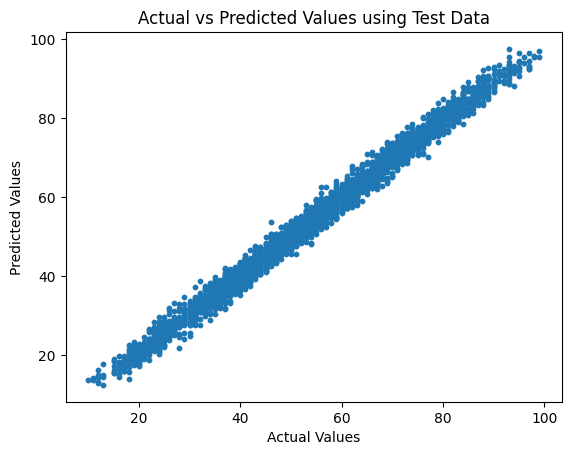

In [44]:
#Scatter plot to depict Actual vs Predicted Values
plt.scatter(y_test,prediction,s=10)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title('Actual vs Predicted Values using Test Data')
plt.show()

In [53]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [54]:
# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [67]:
# Apply polynomial features (degree=2 for quadratic regression)
degree = 3
poly_features = PolynomialFeatures(degree=degree, include_bias=False)
x_poly_train = poly_features.fit_transform(x_train)
x_poly_test = poly_features.transform(x_test)

In [68]:
# Train a linear regression model on the polynomial features
model = LinearRegression()
model.fit(x_poly_train, y_train)

LinearRegression()

In [69]:
# Make predictions
y_train_pred = model.predict(x_poly_train)
y_test_pred = model.predict(x_poly_test)

In [70]:
# Evaluate the model
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

In [72]:
print(f"Degree: {degree}")
print(f"Training MSE: {train_mse:.2f}")
print(f"Testing MSE: {test_mse:.2f}")
print(f"Training R^2: {train_r2:.2f}")
print(f"Testing R^2: {test_r2:.2f}")

Degree: 3
Training MSE: 4.16
Testing MSE: 4.12
Training R^2: 0.99
Testing R^2: 0.99


In [60]:
#spliting into train and test
x= df.drop('Performance Index',axis=1)
y= df['Performance Index']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)
model=LinearRegression()
model.fit(x_train,y_train)
prediction=model.predict(x_test)
print(model.coef_ )
print(model.intercept_)
print(f"Mean squared error: {(mean_squared_error(y_test,prediction)):.2f}")
print(f"Mean absolute error: {(mean_absolute_error(y_test, prediction))}")
print(f"R square: {(r2_score(y_test, prediction)):.2f}")

[2.85895223 1.01551979 0.58171285 0.47967676 0.19039416]
-33.836543807141744
Mean squared error: 4.07
Mean absolute error: 1.6090437564045217
R square: 0.99


In [61]:
#spliting into train and test
x= df.drop('Performance Index',axis=1)
y= df['Performance Index']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.4,random_state=0)
model=LinearRegression()
model.fit(x_train,y_train)
prediction=model.predict(x_test)
print(model.coef_ )
print(model.intercept_)
print(f"Mean squared error: {(mean_squared_error(y_test,prediction)):.2f}")
print(f"Mean absolute error: {(mean_absolute_error(y_test, prediction))}")
print(f"R square: {(r2_score(y_test, prediction)):.2f}")

[2.84958816 1.01997073 0.62772919 0.47390781 0.19047342]
-34.105820439681786
Mean squared error: 4.07
Mean absolute error: 1.6012929194479675
R square: 0.99
